In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
data.describe()

Id    DistrictId         Rooms        Square   LifeSquare  \
count  10000.00000  10000.000000  10000.000000  10000.000000  7887.000000   
mean    8383.40770     50.400800      1.890500     56.315775    37.199645   
std     4859.01902     43.587592      0.839512     21.058732    86.241209   
min        0.00000      0.000000      0.000000      1.136859     0.370619   
25%     4169.50000     20.000000      1.000000     41.774881    22.769832   
50%     8394.50000     36.000000      2.000000     52.513310    32.781260   
75%    12592.50000     75.000000      2.000000     65.900625    45.128803   
max    16798.00000    209.000000     19.000000    641.065193  7480.592129   

       KitchenSquare         Floor    HouseFloor     HouseYear     Ecology_1  \
count   10000.000000  10000.000000  10000.000000  1.000000e+04  10000.000000   
mean        6.273300      8.526700     12.609400  3.990166e+03      0.118858   
std        28.560917      5.241148      6.775974  2.005003e+05      0.119025   
min         0.000000      1.000000      0.000000  1.910000e+03      0.000000   
25%         1.000000      4.000000      9.000000  1.974000e+03      0.017647   
50%         6.000000      7.000000     13.000000  1.977000e+03      0.075424   
75%         9.000000     12.000000     17.000000  2.001000e+03      0.195781   
max      2014.000000     42.000000    117.000000  2.005201e+07      0.521867   

           Social_1      Social_2      Social_3  Healthcare_1   Helthcare_2  \
count  10000.000000  10000.000000  10000.000000   5202.000000  10000.000000   
mean      24.687000   5352.157400      8.039200   1142.904460      1.319500   
std       17.532614   4006.799803     23.831875   1021.517264      1.493601   
min        0.000000    168.000000      0.000000      0.000000      0.000000   
25%        6.000000   1564.000000      0.000000    350.000000      0.000000   
50%       25.000000   5285.000000      2.000000    900.000000      1.000000   
75%       36.000000   7227.000000      5.000000   1548.000000      2.000000   
max       74.000000  19083.000000    141.000000   4849.000000      6.000000   

            Shops_1          Price  
count  10000.000000   10000.000000  
mean       4.231300  214138.857399  
std        4.806341   92872.293865  
min        0.000000   59174.778028  
25%        1.000000  153872.633942  
50%        3.000000  192269.644879  
75%        6.000000  249135.462171  
max       23.000000  633233.466570

In [4]:
data.head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  14038          35    2.0  47.981561   29.442751            6.0      7   
1  15053          41    3.0  65.683640   40.049543            8.0      7   
2   4765          53    2.0  44.947953   29.197612            0.0      8   
3   5809          58    2.0  53.352981   52.731512            9.0      8   
4  10783          99    1.0  39.649192   23.776169            7.0     11   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0         9.0       1969   0.089040         B         B        33      7976   
1         9.0       1978   0.000070         B         B        46     10309   
2        12.0       1968   0.049637         B         B        34      7759   
3        17.0       1977   0.437885         B         B        23      5735   
4        12.0       1976   0.012339         B         B        35      5776   

   Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2          Price  
0         5           NaN            0       11       B  184966.930730  
1         1         240.0            1       16       B  300009.450063  
2         0         229.0            1        3       B  220925.908524  
3         3        1084.0            0        5       B  175616.227217  
4         1        2078.0            2        4       B  150226.531644

In [6]:
data.loc[data['HouseYear']==20052011,'HouseYear']=2008
data.loc[data['HouseYear']==4968,'HouseYear']=1968

In [7]:
train,valid=train_test_split(data,test_size=0.3,random_state=42)

In [8]:
train.shape, valid.shape

((7000, 20), (3000, 20))

In [9]:
scaler=MinMaxScaler()

In [10]:
train_scaled=scaler.fit_transform(train.loc[:,['HouseYear','DistrictId']])

In [11]:
train_scaled

array([[0.9537037 , 0.11004785],
       [0.60185185, 0.11004785],
       [0.68518519, 0.41626794],
       ...,
       [0.60185185, 0.00478469],
       [0.56481481, 0.44976077],
       [0.75      , 0.00956938]])

In [16]:
inertia_arr=[]
for i in range(2,10):
    temp_model=KMeans(n_clusters=i,random_state=42)
    temp_model.fit(train_scaled)
    temp_inertia=temp_model.inertia_
    print(temp_inertia)
    inertia_arr.append(temp_inertia)

275.66445745306356
154.21399483107405
118.34653985063
89.93632943287
75.48717749672792
63.45340020671637
56.389720100191404
50.12616448078286


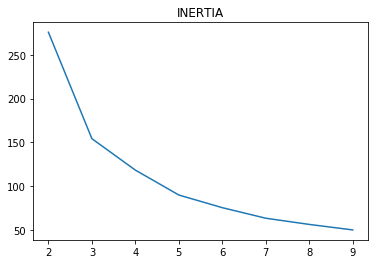

In [18]:
plt.plot([i for i in range(2,10)],inertia_arr)
plt.title('INERTIA');

In [19]:
from sklearn.cluster import AgglomerativeClustering

In [20]:
model=AgglomerativeClustering(n_clusters=5)

In [21]:
train['cluster_year']=model.fit_predict(train_scaled)

Text(0.5, 1.0, 'TRAIN')

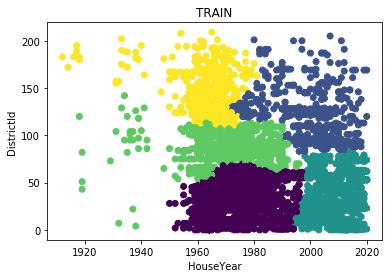

In [22]:
plt.scatter(train['HouseYear'],train['DistrictId'],c=train['cluster_year'])
plt.xlabel('HouseYear')
plt.ylabel('DistrictId')
plt.title('TRAIN')

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn=KNeighborsClassifier(n_neighbors=5)

In [25]:
%%time
knn.fit(train_scaled,train['cluster_year'])

Wall time: 61.7 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [27]:
valid_scaled=scaler.transform(valid.loc[:,['HouseYear','DistrictId']])

In [28]:
valid['cluster_year']=knn.predict(valid_scaled)

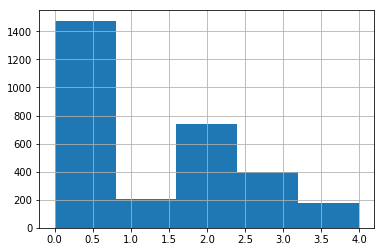

In [29]:
valid.cluster_year.hist(bins=5)

In [36]:
distr_info1=train.DistrictId.value_counts().reset_index().rename(columns={'index':'DistrictId','DistrictId':'large_district'})
distr_info1.head(15)

DistrictId  large_district
0           27             574
1            1             466
2           23             394
3            6             355
4            9             222
5           62             175
6           30             160
7           53             133
8           58             118
9           21             107
10           8             101
11          52              96
12          11              91
13          61              85
14          46              84

In [37]:
distr_info1['is_large']=(distr_info1['large_district']>100).astype(int)

In [39]:
distr_info1.head()

DistrictId  large_district  is_large
0          27             574         1
1           1             466         1
2          23             394         1
3           6             355         1
4           9             222         1

In [40]:
def add_distr_info1(df,distr_info1):
    df=pd.merge(df,distr_info1,on='DistrictId',how='left')
    df['is_large']=df['is_large'].fillna(0)
    df['large_district']=df['large_district'].fillna(1)
    return df

In [42]:
price=train['Price'].mean()
price

214449.16738970255

In [45]:
price_mean_by_rooms=train.groupby(['Rooms'],as_index=False).agg({'Price':'mean'}).rename(columns={'Price':'mean_price_by_rooms'})

In [47]:
price_mean_by_rooms

Rooms  mean_price_by_rooms
0    0.0        184599.160110
1    1.0        160134.810901
2    2.0        215287.628931
3    3.0        290867.452543
4    4.0        385776.526291
5    5.0        386743.536446
6    6.0        229661.964416
7   10.0        317265.323792
8   19.0         78364.616704

In [46]:
price_mean_by_distr_rooms=train.groupby(['DistrictId','Rooms'],as_index=False).agg({'Price':'mean'}).rename(columns={'Price':'mean_price_by_dr'})

In [49]:
price_mean_by_distr_rooms.head()

DistrictId  Rooms  mean_price_by_dr
0           0    1.0     145789.889600
1           0    2.0     198451.332808
2           0    3.0     291670.749162
3           1    1.0     147116.367405
4           1    2.0     198775.648383

In [50]:
def add_mean_price(df,price_mean_by_distr_rooms,price_mean_by_rooms,price):
    df=pd.merge(df,price_mean_by_distr_rooms,on=['DistrictId','Rooms'],how='left')
    df=pd.merge(df,price_mean_by_rooms,on='Rooms',how='left')
    df['mean_price_by_dr']=df['mean_price_by_dr'].fillna(df['mean_price_by_rooms'])
    df['mean_price_by_dr']=df['mean_price_by_dr'].fillna(price)
    df['mean_price_by_rooms']=df['mean_price_by_rooms'].fillna(price)
    return df    

In [51]:
def prepare_data(df,distr_info1,price_mean_by_distr_rooms,price_mean_by_rooms,price):
    df=add_distr_info1(df,distr_info1)
    df=add_mean_price(df,price_mean_by_distr_rooms,price_mean_by_rooms,price)
    return df

In [52]:
train=prepare_data(train,distr_info1,price_mean_by_distr_rooms,price_mean_by_rooms,price)

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 0 to 6999
Data columns (total 25 columns):
Id                     7000 non-null int64
DistrictId             7000 non-null int64
Rooms                  7000 non-null float64
Square                 7000 non-null float64
LifeSquare             5514 non-null float64
KitchenSquare          7000 non-null float64
Floor                  7000 non-null int64
HouseFloor             7000 non-null float64
HouseYear              7000 non-null int64
Ecology_1              7000 non-null float64
Ecology_2              7000 non-null object
Ecology_3              7000 non-null object
Social_1               7000 non-null int64
Social_2               7000 non-null int64
Social_3               7000 non-null int64
Healthcare_1           3642 non-null float64
Helthcare_2            7000 non-null int64
Shops_1                7000 non-null int64
Shops_2                7000 non-null object
Price                  7000 non-null float64
cluster_year  

In [55]:
def dummies(df,cluster_year='cluster_year'):
    df[cluster_year]=df[cluster_year].astype(object)
    df=pd.get_dummies(df)
    return df

In [56]:
train=dummies(train)

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 0 to 6999
Data columns (total 32 columns):
Id                     7000 non-null int64
DistrictId             7000 non-null int64
Rooms                  7000 non-null float64
Square                 7000 non-null float64
LifeSquare             5514 non-null float64
KitchenSquare          7000 non-null float64
Floor                  7000 non-null int64
HouseFloor             7000 non-null float64
HouseYear              7000 non-null int64
Ecology_1              7000 non-null float64
Social_1               7000 non-null int64
Social_2               7000 non-null int64
Social_3               7000 non-null int64
Healthcare_1           3642 non-null float64
Helthcare_2            7000 non-null int64
Shops_1                7000 non-null int64
Price                  7000 non-null float64
large_district         7000 non-null int64
is_large               7000 non-null int32
mean_price_by_dr       7000 non-null float64
mean_price_by_r

In [58]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Price',
       'large_district', 'is_large', 'mean_price_by_dr', 'mean_price_by_rooms',
       'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A',
       'Shops_2_B', 'cluster_year_0', 'cluster_year_1', 'cluster_year_2',
       'cluster_year_3', 'cluster_year_4'],
      dtype='object')

In [59]:
feats=['large_district', 'is_large', 'mean_price_by_dr', 'mean_price_by_rooms',
'cluster_year_0', 'cluster_year_1', 'cluster_year_2',       'cluster_year_3', 'cluster_year_4']

In [60]:
from sklearn.ensemble import RandomForestRegressor as RF

In [61]:
from sklearn.model_selection import GridSearchCV

In [64]:
params={
        'min_samples_leaf':[3,5,7,10],
        'n_estimators':[25,50,75],
        'max_depth':[3,5,7]    
        }
regr=GridSearchCV(RF(),param_grid=params,cv=2)

In [65]:
%%time
regr.fit(train.loc[:,feats],train['Price'])

Wall time: 14.8 s


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': [3, 5, 7, 10], 'n_estimators': [25, 50, 75], 'max_depth': [3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [66]:
regr.best_params_

{'max_depth': 5, 'min_samples_leaf': 7, 'n_estimators': 75}

In [67]:
regr.best_score_

0.6702432662641926

In [68]:
train.loc[:,feats].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 0 to 6999
Data columns (total 9 columns):
large_district         7000 non-null int64
is_large               7000 non-null int32
mean_price_by_dr       7000 non-null float64
mean_price_by_rooms    7000 non-null float64
cluster_year_0         7000 non-null uint8
cluster_year_1         7000 non-null uint8
cluster_year_2         7000 non-null uint8
cluster_year_3         7000 non-null uint8
cluster_year_4         7000 non-null uint8
dtypes: float64(2), int32(1), int64(1), uint8(5)
memory usage: 280.3 KB


In [69]:
model=RF(n_estimators=75,max_depth=5,min_samples_leaf=7)

In [70]:
%%time
model.fit(train.loc[:,feats],train['Price'])

Wall time: 427 ms


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [71]:
valid=prepare_data(valid,distr_info1,price_mean_by_distr_rooms,price_mean_by_rooms,price)

In [72]:
valid=dummies(valid)

In [73]:
y_pred=model.predict(valid.loc[:,feats])

In [74]:
y_pred

array([188543.99140182, 283921.43408793, 211503.323105  , ...,
       258947.94764714, 127456.23556314, 240436.60841311])

In [75]:
from sklearn.metrics import r2_score as r2

In [76]:
r2(valid['Price'],y_pred)

0.5468411036465801

In [77]:
test_scaled=scaler.transform(test.loc[:,['HouseYear','DistrictId']])
test['cluster_year']=knn.predict(test_scaled)

In [78]:
test=prepare_data(test,distr_info1,price_mean_by_distr_rooms,price_mean_by_rooms,price)

In [79]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 24 columns):
Id                     5000 non-null int64
DistrictId             5000 non-null int64
Rooms                  5000 non-null float64
Square                 5000 non-null float64
LifeSquare             3959 non-null float64
KitchenSquare          5000 non-null float64
Floor                  5000 non-null int64
HouseFloor             5000 non-null float64
HouseYear              5000 non-null int64
Ecology_1              5000 non-null float64
Ecology_2              5000 non-null object
Ecology_3              5000 non-null object
Social_1               5000 non-null int64
Social_2               5000 non-null int64
Social_3               5000 non-null int64
Healthcare_1           2623 non-null float64
Helthcare_2            5000 non-null int64
Shops_1                5000 non-null int64
Shops_2                5000 non-null object
cluster_year           5000 non-null int64
large_district  

In [80]:
test=dummies(test)

In [81]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 31 columns):
Id                     5000 non-null int64
DistrictId             5000 non-null int64
Rooms                  5000 non-null float64
Square                 5000 non-null float64
LifeSquare             3959 non-null float64
KitchenSquare          5000 non-null float64
Floor                  5000 non-null int64
HouseFloor             5000 non-null float64
HouseYear              5000 non-null int64
Ecology_1              5000 non-null float64
Social_1               5000 non-null int64
Social_2               5000 non-null int64
Social_3               5000 non-null int64
Healthcare_1           2623 non-null float64
Helthcare_2            5000 non-null int64
Shops_1                5000 non-null int64
large_district         5000 non-null float64
is_large               5000 non-null float64
mean_price_by_dr       5000 non-null float64
mean_price_by_rooms    5000 non-null float64
Ecology_2_A

In [82]:
test['Price']=model.predict(test.loc[:,feats])

In [83]:
test.head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0    725          58    2.0  49.882643   33.432782            6.0      6   
1  15856          74    2.0  69.263183         NaN            1.0      6   
2   5480         190    1.0  13.597819   15.948246           12.0      2   
3  15664          47    2.0  73.046609   51.940842            9.0     22   
4  14275          27    1.0  47.527111   43.387569            1.0     17   

   HouseFloor  HouseYear  Ecology_1  ...  Ecology_3_A  Ecology_3_B  Shops_2_A  \
0        14.0       1972   0.310199  ...            0            1          0   
1         1.0       1977   0.075779  ...            0            1          0   
2         5.0       1909   0.000000  ...            0            1          0   
3        22.0       2007   0.101872  ...            0            1          0   
4        17.0       2017   0.072158  ...            0            1          1   

   Shops_2_B  cluster_year_0  cluster_year_1  cluster_year_2  cluster_year_3  \
0          1               1               0               0               0   
1          1               0               0               0               1   
2          1               0               0               0               0   
3          1               0               0               1               0   
4          0               0               0               1               0   

   cluster_year_4          Price  
0               0  169578.846004  
1               0  229054.127875  
2               1  160822.146377  
3               0  199898.491878  
4               0  124904.742773  

[5 rows x 32 columns]

In [86]:
test.loc[:,['Id','Price']].to_csv('PNagornyi_predictions.csv',index=False) #index=None

In [87]:
pd.read_csv('PNagornyi_predictions.csv')

Id          Price
0       725  169578.846004
1     15856  229054.127875
2      5480  160822.146377
3     15664  199898.491878
4     14275  124904.742773
5      7633  196251.013216
6     13329  135458.758233
7      5502  219587.374238
8      4220  309002.703707
9     11538  216825.535181
10    15975  278304.321449
11     3310  211503.323105
12     9286  150047.415205
13    11260  220524.179533
14     5214  124904.742773
15    11307  175518.747919
16    13543  373282.319834
17      615  158930.289459
18     3495  223397.038731
19     2321  256440.560948
20    12046  172887.893071
21    16688  145890.856469
22    12694  223397.038731
23      783  176852.259433
24     8968  165918.861776
25    13454  197923.090987
26    12190  221354.429277
27    11160  127456.235563
28    10291  186518.500203
29      891  240903.277030
...     ...            ...
4970   1740  219190.934559
4971   3450  143586.357460
4972  16064  139526.233970
4973   1804  124904.742773
4974   5296  135128.765731
4975   5346  492439.683577
4976   4723  349379.203407
4977    417  178126.425212
4978  15756  124904.742773
4979  14090  182947.556083
4980  14778  258388.516700
4981   2560  210318.808898
4982  12920   93914.878193
4983   8249  127456.235563
4984   7125  159845.882673
4985  11732  145890.856469
4986  13365  220946.394581
4987   5361  322550.378078
4988  15937  322395.400981
4989   2591  187104.188654
4990  15706  202139.038656
4991   2105  262741.653722
4992   7220  309002.703707
4993  14562  218978.589405
4994   6836  187104.188654
4995   8180  235230.109838
4996   4695  145944.477533
4997   5783  265775.814199
4998   4780  177693.753350
4999  12504  174772.389174

[5000 rows x 2 columns]